## 图像基本操作

#### 环境配置地址：

- Anaconda:https://www.anaconda.com/download/

- Python_whl:https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv

- eclipse:按照自己的喜好，选择一个能debug就好

# ![title](lena_img.png)
RGB：三个通道，0-255从黑到白，一个图像包含很多像素点，一个像素点像一个矩阵，h=500 w=500，[500，500，3],计算机眼中的图像

灰度图只有一个通道

### 数据读取-图像

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [6]:
#导入三个工具包
import cv2 #cv2是opencv在python的一个缩写，opencv读取的格式是BGR
import matplotlib.pyplot as plt#matplotlib为绘图展示做准备
import numpy as np #numpy最基本数值计算工具包
%matplotlib inline 

img=cv2.imread('cat.jpg')#读取图像，指定好路径

In [7]:
img#给这个图像起名叫img，展示[h,w,c]

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [8]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
cv2.waitKey(0) # 等待时间，毫秒级，0表示任意键终止，1s=1000se
cv2.destroyAllWindows()

In [5]:
#写一个函数来调用
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [243]:
#直接获取图像的h和w，最后的3代表这是一个RGB类型，是一个彩色的，但在opencv中是一个BGR的模式
img.shape

(414, 500, 3)

In [244]:
img=cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)#查看图片的灰度图
img

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [245]:
#只剩下h和w了，就是说只有一个颜色通道，在很多实践中，我们需要把图像先转化成灰度图做一个预处理操作
img.shape

(414, 500)

In [246]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(10000) 
cv2.destroyAllWindows()

In [247]:
#保存
cv2.imwrite('mycat.png',img)

True

In [248]:
type(img)#是一个ndarray的形式

numpy.ndarray

In [249]:
img.size#像素点的个数

207000

In [250]:
img.dtype#数据类型

dtype('uint8')

### 数据读取-视频

- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可。

In [213]:
vc = cv2.VideoCapture('test.mp4')#导入

In [214]:
# 检查是否打开正确
if vc.isOpened(): 
    oepn, frame = vc.read()
else:
    open = False

In [215]:
while open:
    ret, frame = vc.read()#让视频一帧一帧返回，正常情况下1秒有30帧人眼就不会觉得卡顿
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)#三元变二元通道
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:#27是Ascill的esc退出键，也可以改成其他键
            break
vc.release()
cv2.destroyAllWindows()

### 截取部分图像数据

In [253]:
img=cv2.imread('cat.jpg')
cat=img[0:200,0:200] 
cv_show('cat',cat)

### 颜色通道提取

In [254]:
b,g,r=cv2.split(img)#三个通道切分出来

In [255]:
r#检测一下r通道

array([[160, 164, 170, ..., 185, 184, 183],
       [126, 131, 137, ..., 184, 183, 182],
       [127, 131, 138, ..., 183, 182, 181],
       ...,
       [198, 193, 178, ..., 206, 195, 174],
       [176, 183, 175, ..., 188, 144, 125],
       [190, 190, 157, ..., 200, 145, 144]], dtype=uint8)

In [256]:
r.shape

(414, 500)

In [257]:
img=cv2.merge((b,g,r))#bgr颜色通道还原回来
img.shape

(414, 500, 3)

In [258]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)



In [259]:
# 只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [260]:
# 只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

### 边界填充

In [261]:
#通过卷积进行边界填充（上下左右）
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)#按照什么方式进行填充
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)#用什么常熟来进行填充value值是0，黑色

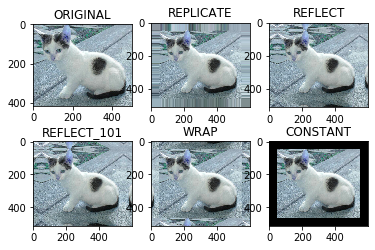

In [262]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素进行填充。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

### 数值计算

In [279]:
img_cat=cv2.imread('cat.jpg')
img_dog=cv2.imread('dog.jpg')

In [280]:
img_cat2= img_cat +10 #在图像当中每个像素点都加10
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [281]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], dtype=uint8)

In [282]:
#相当于% 256，[0,255]一共256个值限制在这个范围
(img_cat + img_cat2)[:5,:,0] 

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [283]:
cv2.add(img_cat,img_cat2)[:5,:,0]#不越界取自身即可

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### 图像融合

In [284]:
img_cat+ img_dog#shape值不同

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [285]:
img_cat.shape

(414, 500, 3)

In [286]:
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

In [291]:
res = cv2.addWeighted(img_cat, 0.5, img_dog, 0.5, 0)#权重

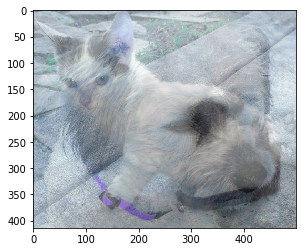

In [292]:
plt.imshow(res)

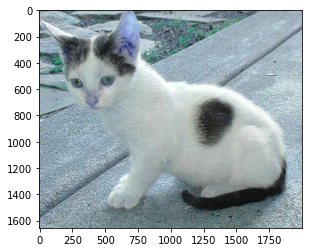

In [277]:
#缩放
res = cv2.resize(img, (0, 0), fx=4, fy=4)
plt.imshow(res)

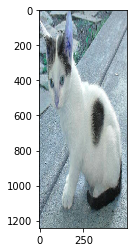

In [278]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)